<a href="https://colab.research.google.com/github/Ronny-Saputra/Machine-Learning/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dibuat oleh : Ronny Saputra

## **Tahapan awal : Pembuatan Model dengan decision tree**

### Pengumpulan Data

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


In [ ]:
df = pd.read_csv('salary.csv')

### Prapemrosesan Data

dalam prapemrosesan data penting untuk kita untuk encoding jika isi yang ada dalam file masi ada alfanumerik maka perlu dilakukan transformasi berupa encoding ke angka 0 dan 1 dst agar Scikit-Learn bisa membacanya nanti. Kita menggunakan fungsi `replace()`

Menampilkan data yang ada agar mempermudah encoding

In [ ]:
print(df['workclass'].unique())
print(df['native-country'].unique())
print(df['occupation'].unique())
print(df['education'].unique())

[0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [ ]:
encoding = {
    "native-country": {
        ' United-States': 0, ' Cuba': 1, ' Jamaica': 2, ' India': 3, ' ?': 4,
        ' Mexico': 5, ' South': 6, ' Puerto-Rico': 7, ' Honduras': 8,
        ' England': 9, ' Canada': 10, ' Germany': 11, ' Iran': 12,
        ' Philippines': 13, ' Italy': 14, ' Poland': 15, ' Columbia': 16,
        ' Cambodia': 17, ' Thailand': 18, ' Ecuador': 19, ' Laos': 20,
        ' Taiwan': 21, ' Haiti': 22, ' Portugal': 23, ' Dominican-Republic': 24,
        ' El-Salvador': 25, ' France': 26, ' Guatemala': 27, ' China': 28,
        ' Japan': 29, ' Yugoslavia': 30, ' Peru': 31,
        ' Outlying-US(Guam-USVI-etc)': 32, ' Scotland': 33,
        ' Trinadad&Tobago': 34, ' Greece': 35, ' Nicaragua': 36,
        ' Vietnam': 37, ' Hong': 38, ' Ireland': 39, ' Hungary': 40,
        ' Holand-Netherlands': 41
    },
    "workclass": {
        ' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2,
        ' Federal-gov': 3, ' Local-gov': 4, ' ?': 5, ' Self-emp-inc': 6,
        ' Without-pay': 7, ' Never-worked': 8
    },
    "occupation": {
        ' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2,
        ' Prof-specialty': 3, ' Other-service': 4, ' Sales': 5, ' Craft-repair': 6,
        ' Transport-moving': 7, ' Farming-fishing': 8, ' Machine-op-inspct': 9,
        ' Tech-support': 10, ' ?': 11, ' Protective-serv': 12,
        ' Armed-Forces': 13, ' Priv-house-serv': 14
    },
    "education": {
        ' Bachelors': 0, ' HS-grad': 1, ' 11th': 2, ' Masters': 3, ' 9th': 4,
        ' Some-college': 5, ' Assoc-acdm': 6, ' Assoc-voc': 7, ' 7th-8th': 8,
        ' Doctorate': 9, ' Prof-school': 10, ' 5th-6th': 11, ' 10th': 12,
        ' 1st-4th': 13, ' Preschool': 14, ' 12th': 15
    }
}

df.replace(encoding, inplace=True)

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0,77516,0,13,Never-married,0,Not-in-family,White,Male,2174,0,40,0,<=50K
1,50,1,83311,0,13,Married-civ-spouse,1,Husband,White,Male,0,0,13,0,<=50K
2,38,2,215646,1,9,Divorced,2,Not-in-family,White,Male,0,0,40,0,<=50K
3,53,2,234721,2,7,Married-civ-spouse,2,Husband,Black,Male,0,0,40,0,<=50K
4,28,2,338409,0,13,Married-civ-spouse,3,Wife,Black,Female,0,0,40,1,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,Married-civ-spouse,10,Wife,White,Female,0,0,38,0,<=50K
32557,40,2,154374,1,9,Married-civ-spouse,9,Husband,White,Male,0,0,40,0,>50K
32558,58,2,151910,1,9,Widowed,0,Unmarried,White,Female,0,0,40,0,<=50K
32559,22,2,201490,1,9,Never-married,0,Own-child,White,Male,0,0,20,0,<=50K


Untuk melihat gaji yang akan diklasifikasi

In [ ]:
df['salary'].value_counts()

,count
salary,
<=50K,24720
>50K,7841


### Training Model

Pada tahap ini kita akan memisahkan feature data (`native-country`, `workclass`,`occupation`, `education`,`hours-per-week`,`age`) dari target data (`salary`). Feature untuk training akan disimpan dalam variabel `X` dan labelnya dalam variabel bernama `y`.

In [ ]:
X = df[['native-country', 'workclass', 'occupation', 'education','hours-per-week','age']]
y = df['salary']

Selanjutnya kita akan melakukan splitting dataset: 80% untuk training dataset dan 20% sebagai testing dataset.

In [ ]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

Dikarenakan di scikitlearn sudah terdapat implementasi decision tree, maka kita tinggal menggunakan nya saja.

In [ ]:
import sklearn.tree as tree

### Pengujian Performa Model

kita akan melatih model dengan menggunakan entropy sebagai kriteria pengukuran proses splitting.

Kita juga bisa menentukan jumlah maksimal kedalaman tree, dalam hal ini kita batasi 5 tingkat saja (max_depth=5).

In [ ]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Sampai titik ini model sudah terbangun dan bisa diuji dengan testing dataset.

In [ ]:
y_prediksi = model.predict(X_test)

In [ ]:
print(y_prediksi)

[' <=50K' ' <=50K' ' >50K' ... ' >50K' ' <=50K' ' <=50K']


In [ ]:
print(y_test)

14160     <=50K
27048     <=50K
28868      >50K
5667      <=50K
7827      <=50K
          ...  
1338      <=50K
24534      >50K
18080      >50K
10354     <=50K
24639     <=50K
Name: salary, Length: 6513, dtype: object


In [ ]:
import sklearn.metrics as met

In [ ]:
print(met.accuracy_score(y_test, y_prediksi))

0.7847382158759404


Akurasi model  78.4% yang artinya sudah cukup baik. Namun, kita akan mencoba meningkatkan akurasi. dengan mengganti criterion splitting dari `entropy` menjadi `gini` dan ulang proses di atas untuk membandingkan hasilnya.

In [ ]:
model2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_prediksi = model2.predict(X_test)
print(y_prediksi)
print(met.accuracy_score(y_test, y_prediksi))


[' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']
0.7885766927683096


Hasil yang didapatkan oleh `gini` 78,8%.
lebih baik sedikit daripada menggunakan `entrophy`

Lalu kita akan mencoba dengan `depth tree` yang berbeda untuk kriteria entroph, dimana menggunakan nama model yang berbeda

In [ ]:
model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
model3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
y_prediksi = model3.predict(X_test)
print(y_prediksi)
print(met.accuracy_score(y_test, y_prediksi))

[' <=50K' ' <=50K' ' >50K' ... ' >50K' ' <=50K' ' <=50K']
0.79149393520651


Hasil menggunakan depth 8  didapatkan lebih tinggi dibanding dengan depth 5 dan menggunakan kriteria entrophy, sehingga dapat disimpulkan `depth tree` berpengaruh terhadap akurasi machine learning

## **Tahapan akhir : Visualisasi**

Mengisntall library yang diperlukan, dikarenakan google colab belum menyediakan untuk library berikut

In [ ]:
!pip install pydotplus
!pip install graphviz

In [ ]:
import pydotplus as pp
import graphviz

In [ ]:
fea_names = ['native-country', 'workclass', 'occupation', 'education','hours-per-week','age']
dot_data = tree.export_graphviz(model, out_file=None, feature_names=fea_names, filled=True, rounded=True)

graph = pp.graph_from_dot_data(dot_data)
graph.write_png('decisiontree.png')

True

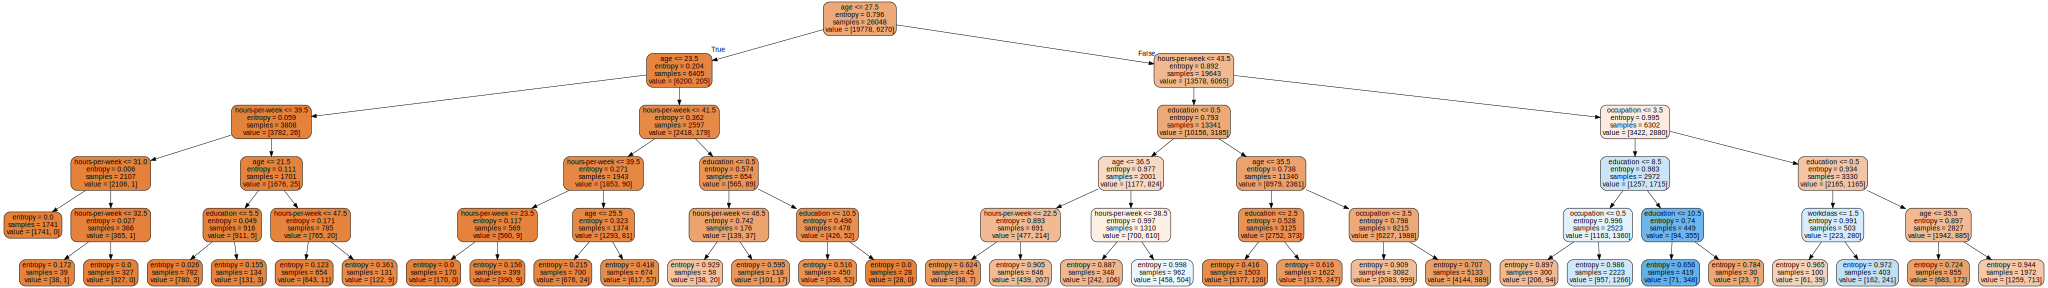

In [ ]:
graph = graphviz.Source(dot_data)
graph

**Kesimpulan**



1.   mengapa hasil akurasi yang dikeluarkan tidak terlalu tinggi?, dikarenakan data yang digunakan tidak seimbang dimana salary <=50k 4x lebih banyak dibanding >50k

2. Hasil yang didapatkan menggunakan `gini` lebih baik sedikit daripada menggunakan `entrophy` tergantung situasi

3. Semakin banyak fitur yang berelasi maka akan meningkatkan akurasi prediksi machine learning itu juga

4. Dept tree dapat mempengaruhi akurasi dari sebuah machine learning model decision tree

